# Load Tensorboard notebook extension

In [1]:
%load_ext tensorboard

# Check Tensorflow version

In [2]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

TensorFlow version:  2.6.0


# Check Tensorboard version

In [3]:
import tensorboard
tensorboard.__version__

'2.6.0'

# Import data

In [1]:
from pathlib import Path
from src.utils.dataset_creator import load_dataset
from src.xbox2_specific.datasets.simple_select import SimpleSelect

train, valid, test = load_dataset(creator=SimpleSelect(),
                                  data_path=Path("C:\\Users\holge\cernbox\CLIC_data\Xbox2_hdf\context.hdf"))

# Create model

In [32]:
import json
from src.model.classifier import Classifier

hp_file = open("C:\\Users\holge\cernbox\mlframework\src/model/default_hyperparameters.json", 'r')
hp_dict = json.load(hp_file)

clf = Classifier(input_shape=train.X.shape, output_directory=Path("/"), **hp_dict)

In [33]:
clf.model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 195, 1)]          0         
_________________________________________________________________
cnn_block_9 (CNNBlock)       (None, 195, 128)          1664      
_________________________________________________________________
cnn_dropout_block (CNNDropou (None, 195, 256)          165120    
_________________________________________________________________
cnn_block_10 (CNNBlock)      (None, 195, 128)          98944     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258 

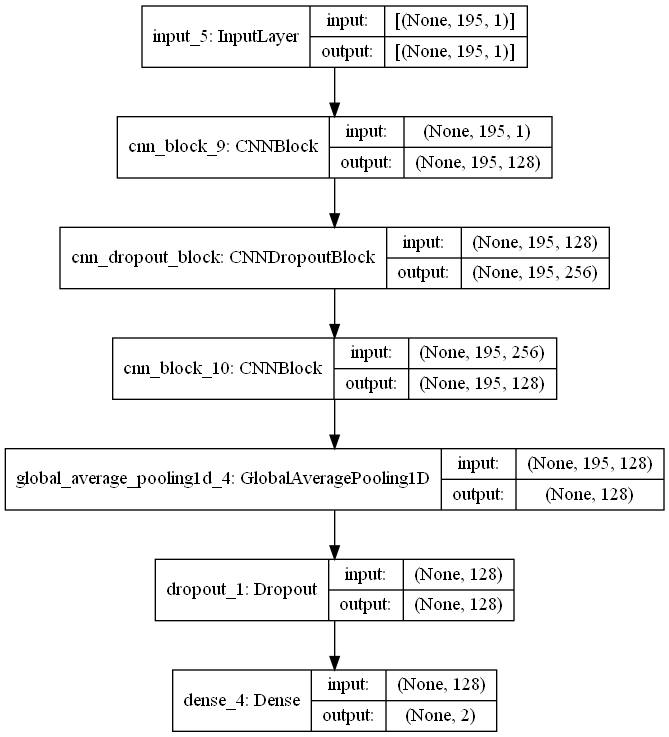

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(clf.model,
           to_file="model_plot1.png", show_shapes=True, show_layer_names=True)
# img_file_name = "/C:\\Users\holge\cernbox\mlframework\src/model/classifiers/model_plots" + hp_dict['classifier_name'] + '_model_plot.png'
# TODO: figure out how to automatically save figure?

# Define the Keras TensorBoard callback

In [7]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Fit model
Fit model on training and validation set

In [8]:
clf.model.fit(x=train.X,
              y=train.y,
              batch_size=16,
              epochs=5,
              verbose=1,
              validation_data=(valid.X, valid.y),
              callbacks=[tensorboard_callback])

Epoch 1/5
1037/1037 [==============================] - 34s 23ms/step - loss: 0.5781 - tp: 12141.0000 - fp: 4437.0000 - tn: 12141.0000 - fn: 4437.0000 - accuracy: 0.7324 - precision: 0.7324 - recall: 0.7324 - auc: 0.7536 - prc: 0.7249 - val_loss: 0.5721 - val_tp: 3427.0000 - val_fp: 1309.0000 - val_tn: 3427.0000 - val_fn: 1309.0000 - val_accuracy: 0.7236 - val_precision: 0.7236 - val_recall: 0.7236 - val_auc: 0.7671 - val_prc: 0.7639

# Evaluate model
Evaluate model on test set

In [9]:
results = clf.model.evaluate(x=test.X, y=test.y, return_dict=True)

75/75 [==============================] - 2s 8ms/step - loss: 0.5515 - tp: 1721.0000 - fp: 648.0000 - tn: 1721.0000 - fn: 648.0000 - accuracy: 0.7265 - precision: 0.7265 - recall: 0.7265 - auc: 0.7987 - prc: 0.7901

# Start tensorboard
Start TensorBoard within the notebook using magics:

In [11]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 29104), started 0:05:59 ago. (Use '!kill 29104' to kill it.)